In [1]:
import numpy as np
import sys
from pathlib import Path
project_root = Path().resolve().parent
sys.path.append(str(project_root))
from utils.sampling import *
from utils.LGCP_Torch import * 

### Data Generation

Generate 'n_samples' data points using a custom function 'true_pdf' with real parameters 'PARAMS'.  
The code is optimized for data in the range \[0, 1\], but any other range can be normalized with a linear transformation:

$x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$


Fitted Parameters are a = 0.0, b = 3.020398447389449


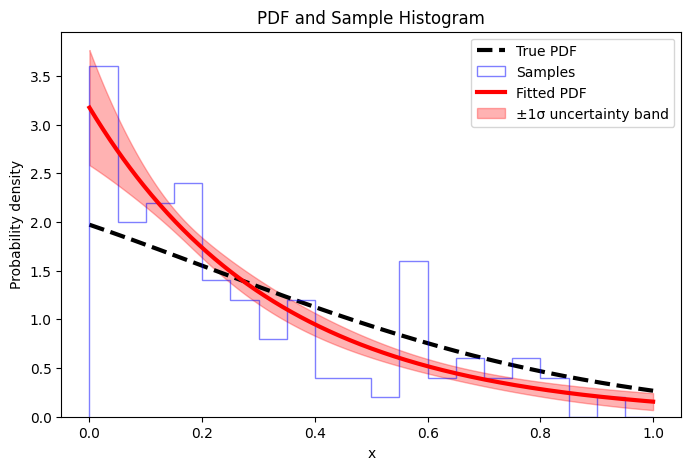

In [2]:

true_pdf = lambda x, a, b: np.exp(-a*x**2 - b*x) ### 
n_samples = 100
PARAMS = [1,1]
seed = 1

function_model = CustomPDFModel(true_pdf,PARAMS,n_samples,seed) 

samples = function_model.sample() # Samples n_samples from true_pdf
fitted_params = function_model.fit([1,1]) # Fit the samples to the true_pdf with some initial guess
print(f'Fitted Parameters are a = {fitted_params[0]}, b = {fitted_params[1]}')
ref_fit,ref_unc = function_model.plot(bins = 20) # Plot results

### Model Setup

- `samples`: the input toy samples.
- `optimizing_point`: discretized x-values used for inference.  
  Rule of thumb — more points give better accuracy, but increase computation time.
- `length_scale`, `var_scale`: initial values for the kernel hyperparameters.  
  A value of 1 is typically a good starting point for both.

### Hyperparameter Optimization

- `epochs`: number of iterations in the gradient descent loop.
- `lr`: learning rate for the optimizer.

### Mean Fit

- `epochs`: number of iterations in the gradient descent loop.
- `lr`: learning rate for the optimizer.

### Posterior Plotting

- `true_pdf(model.x, *PARAMS)`: the original PDF used to generate the data.
- `ref_fit`: the MLE-based fit to compare against.
- `ref_unc`: uncertainty band of the MLE fit.
- `steps`: number of sampling steps for the NUTS MCMC used in posterior estimation.


Sample: 100%|██| 150/150 [00:28,  5.34it/s, step size=1.24e-02, acc. prob=0.859]


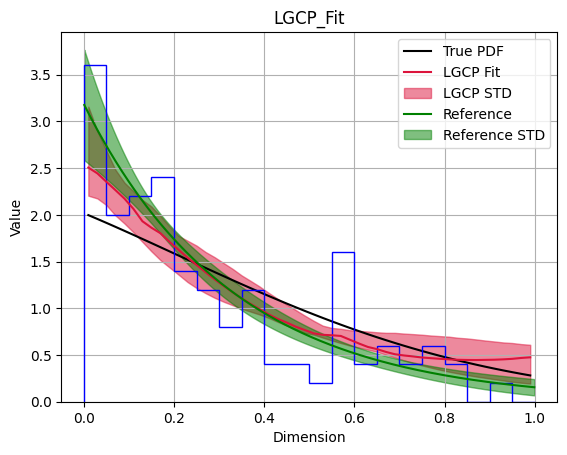

In [4]:
model = TorchModel(samples,optimizing_points = 50,length_scale = 1,var_scale = 1)
model.grad_optimize_hyperparameters(epochs = 100,lr = 0.01)
model.mean_fit(epochs = 500,lr = 0.01)
model.plot(true_pdf(model.x,*PARAMS),ref_fit,ref_unc,MCMC_steps = 1000)
